In [116]:
import numpy as np 
import pandas as pd
import os

In [117]:
#đọc file
data=pd.read_csv('C:/Users/Admin/Downloads/water_data.csv',encoding="ISO-8859-1")
# chuyen NAN thanh 0
data.fillna(0, inplace=True)
data.head()

,STATION CODE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [118]:
#xác định kiểu dữ liệu
data.dtypes

STATION CODE                        object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [119]:
# chuyển đổi kiểu dữ liệu 
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes 

STATION CODE                         object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [120]:
data.head()

,STATION CODE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,30.6,6.7,7.5,203.0,NaN,0.1,11,27.0,2014
1,1399,29.8,5.7,7.2,189.0,2.0,0.2,4953,8391.0,2014
2,1475,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330.0,2014
3,3181,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443.0,2014
4,3182,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500.0,2014


In [121]:
#chon va doi ten cac cot du lieu can dung
start=2
end=1779
station=data.iloc [start:end ,0]
do= data.iloc [start:end ,2].astype(np.float64)
value=0
ph = data.iloc[ start:end,3]  
co = data.iloc [start:end ,4].astype(np.float64)   
  
year=data.iloc[start:end,9]
tc=data.iloc [2:end ,8].astype(np.float64)
bod = data.iloc [start:end ,5].astype(np.float64)
na= data.iloc [start:end ,6].astype(np.float64)
na.dtype
data.head()

,STATION CODE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,30.6,6.7,7.5,203.0,NaN,0.1,11,27.0,2014
1,1399,29.8,5.7,7.2,189.0,2.0,0.2,4953,8391.0,2014
2,1475,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330.0,2014
3,3181,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443.0,2014
4,3182,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500.0,2014


In [122]:
data=pd.concat([do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['do','ph','co','bod','na','tc','year']
data

,do,ph,co,bod,na,tc,year
2,6.300,6.900,179.0,1.7,0.1,5330.0,2014
3,5.800,6.900,64.0,3.8,0.5,8443.0,2014
4,5.800,7.300,83.0,1.9,0.4,5500.0,2014
5,5.500,7.400,81.0,1.5,0.1,4049.0,2014
6,6.100,6.700,308.0,1.4,0.3,5672.0,2014
...,...,...,...,...,...,...,...
1774,4.600,3.000,350.0,6.2,2.2,49.0,2006
1775,8.800,7.000,172.0,1.6,5.0,2800.0,2006
1776,10.000,7.100,150.0,1.0,4.0,350.0,2006
1777,9.000,7.300,158.0,1.8,7.2,280.0,2006


In [123]:
# Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
#dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
#total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))
#B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
#electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
#nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

data.dtypes

do      float64
ph      float64
co      float64
bod     float64
na      float64
tc      float64
year      int64
npH       int64
ndo       int64
nco       int64
nbdo      int64
nec       int64
nna       int64
dtype: object

In [124]:
# tính toán các thông số của wqi
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data


,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
2,6.300,6.900,179.0,1.7,0.1,5330.0,2014,80,100,40,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,5.800,6.900,64.0,3.8,0.5,8443.0,2014,80,80,40,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,5.800,7.300,83.0,1.9,0.4,5500.0,2014,100,80,40,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,5.500,7.400,81.0,1.5,0.1,4049.0,2014,100,80,40,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,6.100,6.700,308.0,1.4,0.3,5672.0,2014,60,100,40,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,4.600,3.000,350.0,6.2,2.2,49.0,2006,0,60,80,60,0,100,0.0,16.86,14.04,0.00,2.8,22.48,56.18
1775,8.800,7.000,172.0,1.6,5.0,2800.0,2006,100,100,40,100,60,100,16.5,28.10,23.40,0.54,2.8,11.24,82.58
1776,10.000,7.100,150.0,1.0,4.0,350.0,2006,100,100,60,100,80,100,16.5,28.10,23.40,0.72,2.8,16.86,88.38
1777,9.000,7.300,158.0,1.8,7.2,280.0,2006,100,100,60,100,60,100,16.5,28.10,23.40,0.54,2.8,16.86,88.20


In [125]:
#tinh wqi trung binh theo tung nam
ag=data.groupby('year')['wqi'].mean()

In [126]:
data=ag.reset_index(level=0)
data

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


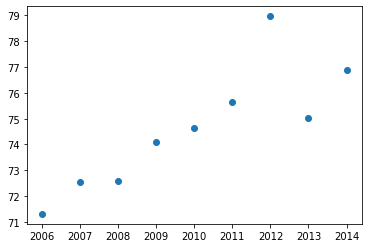

In [127]:
#scatter plot of data 
y = data['wqi']
x = data['year']
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

<AxesSubplot:xlabel='year'>

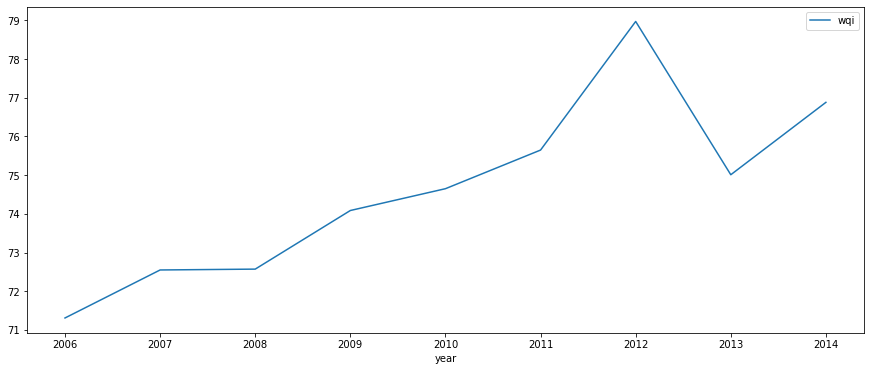

In [128]:
data=data.set_index('year')
data.plot(figsize=(15,6))

In [129]:
data=data.reset_index(level=0,inplace=False)
y = data['wqi']
x = data[['year']]
def linear_regression(y, v_matrix):
    w_1 = np.linalg.pinv(np.dot(v_matrix.T, v_matrix))
    w_2 = np.dot(v_matrix.T, y)
    w = np.dot(w_1, w_2)
    return w

In [130]:
#xu ly du lieu dau vao
b_vector = np.array(np.ones((x.__len__(), 1)))
a_matrix = np.concatenate((b_vector, x), axis=1)
liner_vector = linear_regression(y, a_matrix)

In [131]:
print('Close form Solution : w = ', liner_vector.T)

Close form Solution : w =  [-1.40011894e+03  7.33705815e-01]


In [132]:
#using linear regression to predict
from sklearn import linear_model
reg=linear_model.LinearRegression()
data=data.reset_index(level=0,inplace=False)
y = data['wqi']
x = data[['year']]
y1=y

In [133]:
reg.fit(x,y)

LinearRegression()

In [134]:
reg.coef_

array([0.73370584])

In [135]:
reg.intercept_

-1400.1189972751154

In [136]:

def predic_cfs(x):
    p=pd.DataFrame(x)
    a=reg.predict(p)
    return a

In [137]:
dd=predic_cfs([2015])
dd

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([78.29827939])

In [138]:
#du doan tu 2006 den 2014 
y_cfs = predic_cfs([2006,2007,2008,2009,2010,2011,2012,2013,2014])
y_cfs

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([71.69492679, 72.42863264, 73.16233848, 73.89604433, 74.62975017,
       75.36345602, 76.09716186, 76.83086771, 77.56457355])

In [139]:
ss_cfs = pd.DataFrame({'Actual': y, 'Predicted_close form solution': y_cfs}) 
ss_cfs

,Actual,Predicted_close form solution
0,71.308824,71.694927
1,72.549000,72.428633
2,72.570943,73.162338
3,74.085193,73.896044
4,74.648723,74.629750
5,75.647013,75.363456
6,78.969041,76.097162
7,75.009425,76.830868
8,76.879588,77.564574


In [140]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y,y_cfs))

mse:1.41


In [141]:
#using gradient descent 
#chuan hoa du lieu
x_ch = (x - x.mean()) / x.std()
a,b = x.shape
x_ch = np.c_[np.ones((a,1)), x_ch]
x_ch

array([[ 1.        , -1.46059349],
       [ 1.        , -1.09544512],
       [ 1.        , -0.73029674],
       [ 1.        , -0.36514837],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.36514837],
       [ 1.        ,  0.73029674],
       [ 1.        ,  1.09544512],
       [ 1.        ,  1.46059349]])

In [142]:
alpha = 0.1 #toc do hoc
iterations = 300 #so lan lap
m = y.size 
theta=[100,100]
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x_ch, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))
print(past_costs[4])

Gradient Descent: 74.63, 2.01
2165.790002585108


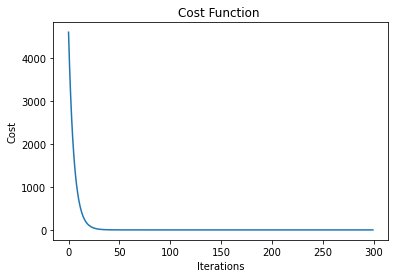

In [143]:
plt.title('Cost Function ')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [144]:
import numpy as np
  
y_gd=x_ch.dot(theta)

ss_gd = pd.DataFrame({'Actual': y, 'Predicted_gradient descent': y_gd})  
ss_gd

,Actual,Predicted_gradient descent
0,71.308824,71.694927
1,72.549000,72.428633
2,72.570943,73.162338
3,74.085193,73.896044
4,74.648723,74.629750
5,75.647013,75.363456
6,78.969041,76.097162
7,75.009425,76.830868
8,76.879588,77.564574


In [145]:
## so sanh gia tri close form solution va gradient descent
ss = pd.concat([ss_cfs,ss_gd['Predicted_gradient descent']],axis=1)
ss

,Actual,Predicted_close form solution,Predicted_gradient descent
0,71.308824,71.694927,71.694927
1,72.549000,72.428633,72.428633
2,72.570943,73.162338,73.162338
3,74.085193,73.896044,73.896044
4,74.648723,74.629750,74.629750
5,75.647013,75.363456,75.363456
6,78.969041,76.097162,76.097162
7,75.009425,76.830868,76.830868
8,76.879588,77.564574,77.564574


In [146]:
#ham du doan dung gradient descent
u=y_gd[4]
i=y_gd[1]-y_gd[0]
def predic_gd(x):
    ny=x-2010
    yl=u+i*ny
    return yl

In [147]:
dd=predic_gd(2019)
dd

81.23310277271432

In [148]:
#sai so binh phuong trung binh
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y,y_gd))

mse:1.41


In [149]:
#sai so tuyet doi trung binh
from sklearn.metrics import mean_absolute_error
print('mae:%.2f'%mean_absolute_error(y,y_gd))

mae:0.77


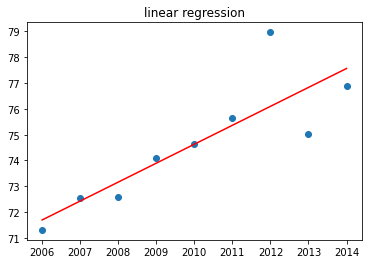

In [150]:
#ket qua va du doan
x_axis=x
y_axis=ss.Actual
y1_axis=ss['Predicted_gradient descent']
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()


In [151]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
def split_sequence(sequence, n_steps):
	X1, y1 = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X1.append(seq_x)
		y1.append(seq_y)
	return array(X1), array(y1)

 
raw_seq = y
n_steps = 3

X, y = split_sequence(raw_seq, n_steps)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
y_lstm=[]
y_lstm2=[]

for i in range(len(raw_seq)):
  if i > (len(raw_seq)-4):
     break
  x_input = array(raw_seq[i:i+3])
  x_input = x_input.reshape((1, n_steps, n_features)) 
  yhat = model.predict(x_input, verbose=0)
  y_lstm.append(yhat)
  y_lstm1=np.array(y_lstm)

for i in range(6):
	y_lstm2.append(y_lstm1[i,0,0]) 
	
ss_lstm = pd.DataFrame({'Actual': y1[3:9], 'LSTM': y_lstm2})  
ss_lstm


,Actual,LSTM
3,74.085193,73.648224
4,74.648723,74.592628
5,75.647013,75.092171
6,78.969041,76.258545
7,75.009425,77.338745
8,76.879588,78.227585


In [152]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y1[3:9],y_lstm2))

mse:2.52


In [153]:
#sai so tuyet doi trung binh
from sklearn.metrics import mean_absolute_error
print('mae:%.2f'%mean_absolute_error(y1[3:9],y_lstm2))

mae:1.24
